# Non-negative Least Squares

$\underset{\beta}{\text{min}} \;\; f(\beta) = \frac{1}{2}\| A\beta - y \|_2^2 \;\; s.t. \;\; \beta \geq 0$ 

Gradient Descent: $ \beta^{t+1} = \beta^{t}- \alpha\nabla f^{t} $

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.loadtxt('dataA.txt')
data

array([[ 1.        ,  3.03597151],
       [ 1.375     ,  3.2302178 ],
       [ 1.75      ,  5.08266774],
       [ 2.125     ,  4.23354607],
       [ 2.5       ,  7.71551192],
       [ 2.875     ,  7.05312961],
       [ 3.25      ,  6.94949779],
       [ 3.625     ,  7.36438749],
       [ 4.        ,  9.75842806],
       [ 4.375     ,  8.84894433],
       [ 4.75      , 10.01576236],
       [ 5.125     , 11.1044545 ],
       [ 5.5       , 12.20425869],
       [ 5.875     , 12.12149631],
       [ 6.25      , 12.74449077],
       [ 6.625     , 13.88234691],
       [ 7.        , 15.70490695],
       [ 7.375     , 13.55570249],
       [ 7.75      , 15.68780051],
       [ 8.125     , 16.10741561],
       [ 8.5       , 16.83931854],
       [ 8.875     , 18.3585273 ],
       [ 9.25      , 18.36130798],
       [ 9.625     , 18.74166417],
       [10.        , 18.56404935]])

In [3]:
x = data[:,0]

In [4]:
y = data[:,1]
y

array([ 3.03597151,  3.2302178 ,  5.08266774,  4.23354607,  7.71551192,
        7.05312961,  6.94949779,  7.36438749,  9.75842806,  8.84894433,
       10.01576236, 11.1044545 , 12.20425869, 12.12149631, 12.74449077,
       13.88234691, 15.70490695, 13.55570249, 15.68780051, 16.10741561,
       16.83931854, 18.3585273 , 18.36130798, 18.74166417, 18.56404935])

In [5]:
def plotMyData(x, y):
    # STEP 1: Create a canvas
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    #----------------------------------------------------#
    #This can be modified
    
    # STEP 2: Plot something
    ax.scatter(x, y, marker = 'x', color = 'blue', label = 'MyPoints')
    #ax.clear() if you want to remove the previous plot
    #----------------------------------------------------#
    
    #STEP 3: Compute and set better ticks
        
    xmin, xmax= min(x), max(x)
    
    ymin, ymax = min(y), max(y)
    
    ax.set_yticks(np.linspace(int(ymin)-1, int(ymax+1) + 1, 5))
    
    #Specify the size of the ticks
    ax.tick_params(axis='both', labelsize=10)
    
    #STEP 4: Set labels
    ax.set_xlabel('x-axis',fontsize=16)
    ax.set_ylabel('y-axis', fontsize=16)
    
    #STEP 5: Set General Info
    ax.set_title(r'Simple Plot for y', fontsize=20)
    
    ax.legend(loc='upper left')
    
    #Show the grid
    ax.grid(b = True)
        
    #fig.savefig("SimplePlot.png", dpi = 200)

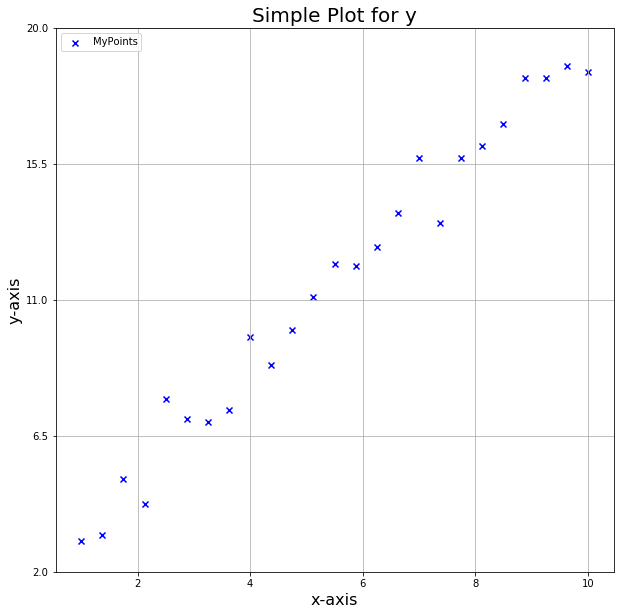

In [6]:
plotMyData(x, y)

# Construct Matrix A

In [7]:
n = data.shape[0]

In [8]:
A = np.ones((n,2))

In [9]:
#The second column is the value of the x variables
A[:,1] = x

In [10]:
A

array([[ 1.   ,  1.   ],
       [ 1.   ,  1.375],
       [ 1.   ,  1.75 ],
       [ 1.   ,  2.125],
       [ 1.   ,  2.5  ],
       [ 1.   ,  2.875],
       [ 1.   ,  3.25 ],
       [ 1.   ,  3.625],
       [ 1.   ,  4.   ],
       [ 1.   ,  4.375],
       [ 1.   ,  4.75 ],
       [ 1.   ,  5.125],
       [ 1.   ,  5.5  ],
       [ 1.   ,  5.875],
       [ 1.   ,  6.25 ],
       [ 1.   ,  6.625],
       [ 1.   ,  7.   ],
       [ 1.   ,  7.375],
       [ 1.   ,  7.75 ],
       [ 1.   ,  8.125],
       [ 1.   ,  8.5  ],
       [ 1.   ,  8.875],
       [ 1.   ,  9.25 ],
       [ 1.   ,  9.625],
       [ 1.   , 10.   ]])

# Gradient Descent for NNLS

In [13]:
def gd_nnls(A, y, max_iter, alpha):
    
    #Initialize b between 0 and 1 with nx2 dim
    dim = A.shape[1]
    b = np.random.random(dim)
    
    #The minimum value of the distance of the function
    minFb = []
    grad = []
    
    for t in range(max_iter):
        
        #Compute the gradient
        g = (A.T @ A ) @ b - A.T @ y
        
        #We want to move in a specific direction but we don't care how much
        g /= np.linalg.norm(g)
        
        #Compute the next position
        b = b - alpha * g
        
        #Keep track of error and norm of gradient
        minFb.append(0.5 * np.linalg.norm( A@b - y) )
        grad.append( np.linalg.norm(g))
        
    return {'b':b, 'minFb': minFb, 'grad':grad}
    

In [14]:
sol = gd_nnls(A, y, 100, 0.1)


# Plot the erros during iterations

In [16]:
def plot02(max_iter, alpha):
    # STEP 1: Create a canvas
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    #----------------------------------------------------#
    #This can be modified
    
    # STEP 2: Plot something
    sol = gd_nnls(A, y, max_iter, alpha)
    ax.plot(sol['minFb'], marker = 'x', color = 'blue', label = 'MyPoints')
    #ax.clear() if you want to remove the previous plot
    #----------------------------------------------------#
    
    #STEP 3: Compute and set better ticks
        
    xmin, xmax= min(x), max(x)
    
    ymin, ymax = min(y), max(y)
    
    ax.set_yticks(np.linspace(int(ymin)-1, int(ymax+1) + 1, 5))
    
    #Specify the size of the ticks
    ax.tick_params(axis='both', labelsize=10)
    
    #STEP 4: Set labels
    ax.set_xlabel('x-axis',fontsize=16)
    ax.set_ylabel('y-axis', fontsize=16)
    
    #STEP 5: Set General Info
    ax.set_title(r'Value of f over iterations', fontsize=20)
    
    ax.legend(loc='upper left')
    
    #Show the grid
    ax.grid(b = True)
        
    #fig.savefig("SimplePlot.png", dpi = 200)

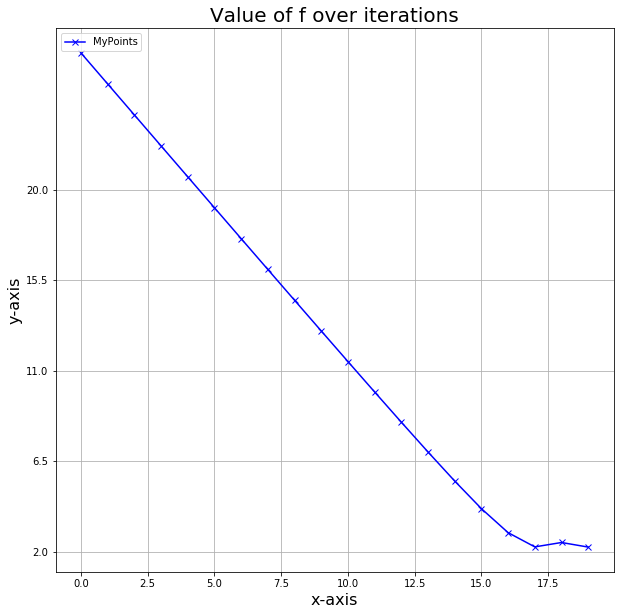

In [17]:
plot02(20, 0.1)

# Plot the fitting line

In [18]:
def plot01(x, y, b):
    # STEP 1: Create a canvas
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    #----------------------------------------------------#
    #This can be modified
    
    # STEP 2: Plot something
    ax.scatter(x, y, marker = 'x', color = 'blue', label = 'MyPoints')
    ax.plot(x, b[0] + b[1]*x, color = 'red', label = 'Fitted Line')
    #ax.clear() if you want to remove the previous plot
    #----------------------------------------------------#
    
    #STEP 3: Compute and set better ticks
        
    xmin, xmax= min(x), max(x)
    
    ymin, ymax = min(y), max(y)
    
    ax.set_yticks(np.linspace(int(ymin)-1, int(ymax+1) + 1, 5))
    
    #Specify the size of the ticks
    ax.tick_params(axis='both', labelsize=10)
    
    #STEP 4: Set labels
    ax.set_xlabel('x-axis',fontsize=16)
    ax.set_ylabel('y-axis', fontsize=16)
    
    #STEP 5: Set General Info
    ax.set_title(r'Simple Plot for y', fontsize=20)
    
    ax.legend(loc='upper left')
    
    #Show the grid
    ax.grid(b = True)
        
    #fig.savefig("SimplePlot.png", dpi = 200)

In [19]:
sol = gd_nnls(A, y, 20, 0.1)
b = sol['b']

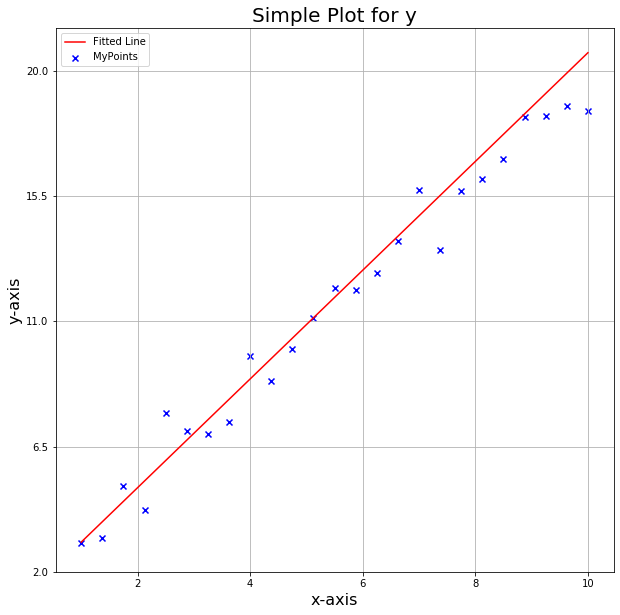

In [20]:
plot01(x,y, sol['b'])